In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from a CSV file (change the path to your file)
file_path = r'Data/skymate_logger_18_07_14.csv'
df = pd.read_csv(file_path)
df['time'] = pd.to_datetime(df['systemTimeMs'], unit='ms')

# Display the first few rows to understand the data structure
df.head()

,systemTimeMs,gnssTime,latitudeDeg,longitudeDeg,altitude,rollDeg,pitchDeg,yawDeg,agl,hSpeed,time
0,1720289255300,1.720289e+09,52.804394,-67.420781,605.750244,1.811944,0.458563,145.664917,0.0,0.000518,2024-07-06 18:07:35.300
1,1720289255400,1.720289e+09,52.804394,-67.420781,605.752563,1.813211,0.455188,145.663834,0.0,0.000679,2024-07-06 18:07:35.400
2,1720289255500,1.720289e+09,52.804394,-67.420781,605.754883,1.814849,0.445886,145.675156,0.0,0.000958,2024-07-06 18:07:35.500
3,1720289255600,1.720289e+09,52.804394,-67.420781,605.757202,1.819924,0.448409,145.691986,0.0,0.000431,2024-07-06 18:07:35.600
4,1720289255700,1.720289e+09,52.804394,-67.420781,605.757690,1.817311,0.451733,145.706360,0.0,0.000368,2024-07-06 18:07:35.700


In [57]:
df.columns

Index(['systemTimeMs', 'gnssTime', 'latitudeDeg', 'longitudeDeg', 'altitude',
       'rollDeg', 'pitchDeg', 'yawDeg', 'agl', 'hSpeed', 'time'],
      dtype='object')

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plot_data_analysis(csv_file, col1, col2):
    # Load the CSV file into a DataFrame
    csv_file=str(csv_file)
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print("The specified CSV file was not found.")
        return

    # Check if the columns exist in the DataFrame
    if col1 not in df.columns or col2 not in df.columns:
        print("One or both column names do not exist in the DataFrame.")
        return
    
    rms_col2 = np.sqrt(np.mean(df[col2] ** 2))  # Root Mean Square
    avg_col2 = df[col2].mean()  # Average
    max_col2 = df[col2].max()  # Maximum
    min_col2 = df[col2].min()  # Minimum
    var1 = df[col1].var()  # Variance of col1

    # Calculate variance
    var1 = df[col1].var()
    var2 = df[col2].var()
    print(var1)
    print(f"Variance of {col1}: {var1}")
    print(f"Variance of {col2}: {var2}")

    # Calculate frequency
    freq1 = df[col1].value_counts()
    freq2 = df[col2].value_counts()
    print(f"\nFrequency of {col1}:\n{freq1}")
    print(f"\nFrequency of {col2}:\n{freq2}")

    # Plot scatter plot of the two columns
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=df[col1], y=df[col2])
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    text_str = (f'RMS: {rms_col2:.2f}\n'
                f'Average: {avg_col2:.2f}\n'
                f'Maximum: {max_col2:.2f}\n'
                f'Minimum: {min_col2:.2f}')
    plt.text(0.05, 0.95, text_str, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="lightyellow"))

    plt.show()

    plt.show()

    # Plot frequency distribution for both columns
    plt.figure(figsize=(14, 6))
    sns.histplot(df[col2], kde=True, bins=20)
    plt.title('Histogram')
    plt.tight_layout()
    plt.show()

82643071216.04791
Variance of TimeMs: 82643071216.04791
Variance of H.Speed: 0.4519679398243438

Frequency of TimeMs:
TimeMs
0         1
664092    1
663392    1
663493    1
663593    1
         ..
331992    1
332092    1
332192    1
332292    1
995692    1
Name: count, Length: 9958, dtype: int64

Frequency of H.Speed:
H.Speed
0.351290    1613
2.202504       1
2.202195       1
2.202040       1
2.201886       1
            ... 
1.823209       1
1.823084       1
1.822958       1
1.822828       1
2.000512       1
Name: count, Length: 8346, dtype: int64


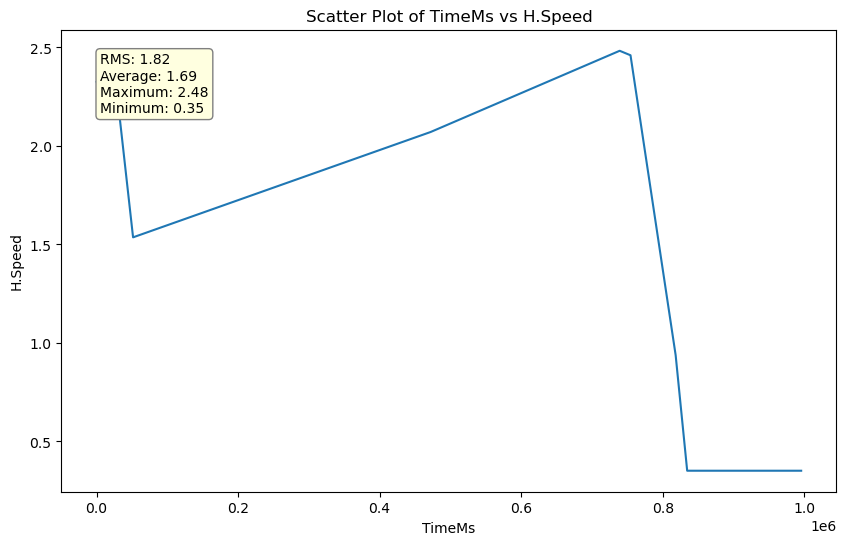

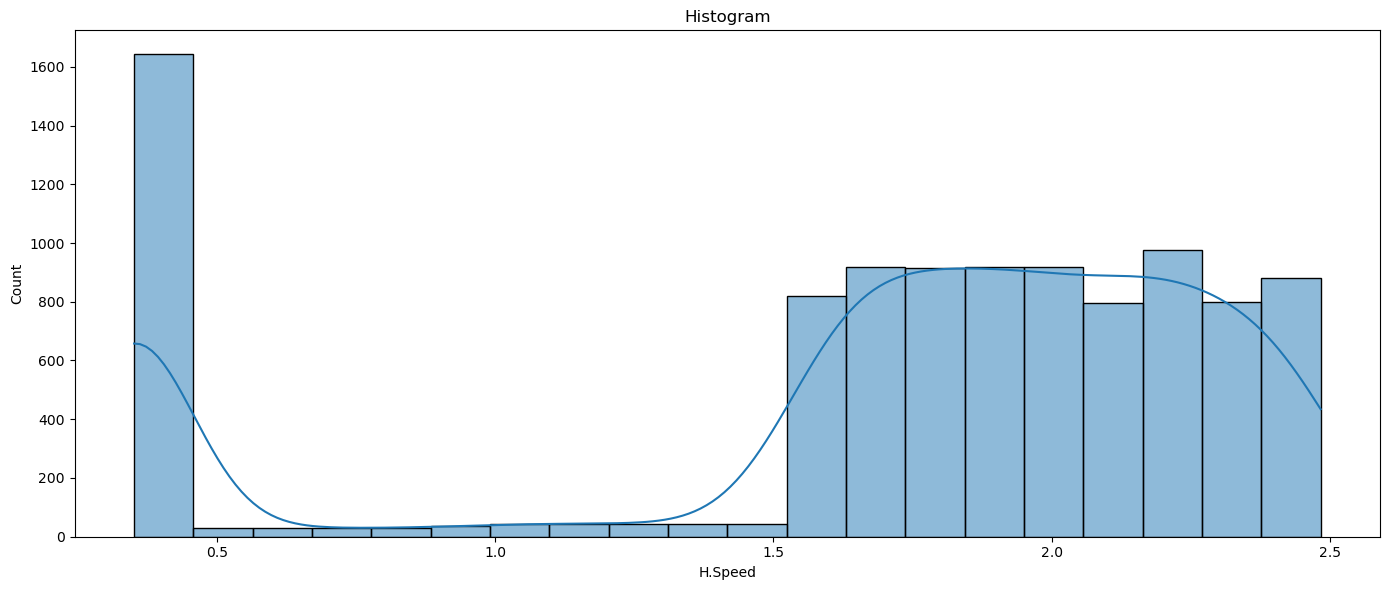

82643071216.04791
Variance of TimeMs: 82643071216.04791
Variance of pitchDeg: 12.257987076148133

Frequency of TimeMs:
TimeMs
0         1
664092    1
663392    1
663493    1
663593    1
         ..
331992    1
332092    1
332192    1
332292    1
995692    1
Name: count, Length: 9958, dtype: int64

Frequency of pitchDeg:
pitchDeg
-0.179407    2
-1.145169    1
-0.477868    1
-0.896745    1
-1.201107    1
            ..
-2.511140    1
-2.791315    1
-2.888204    1
-3.293218    1
-0.179766    1
Name: count, Length: 9957, dtype: int64


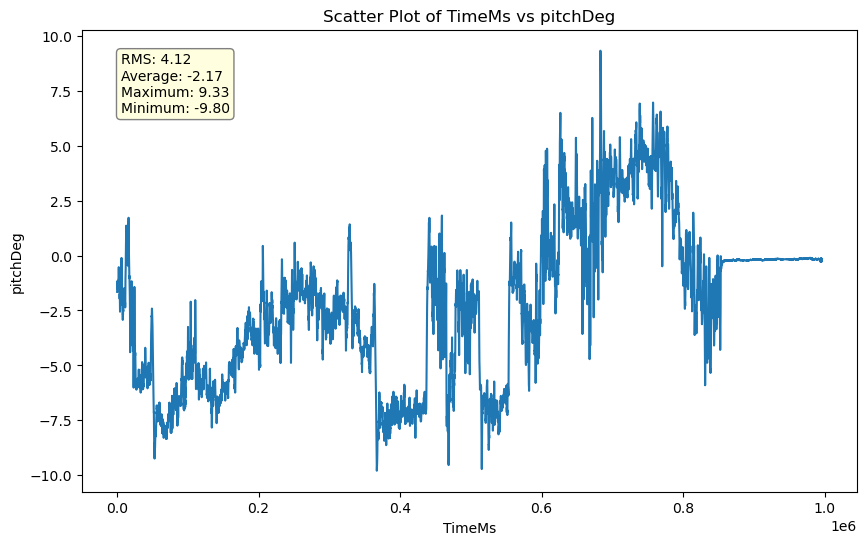

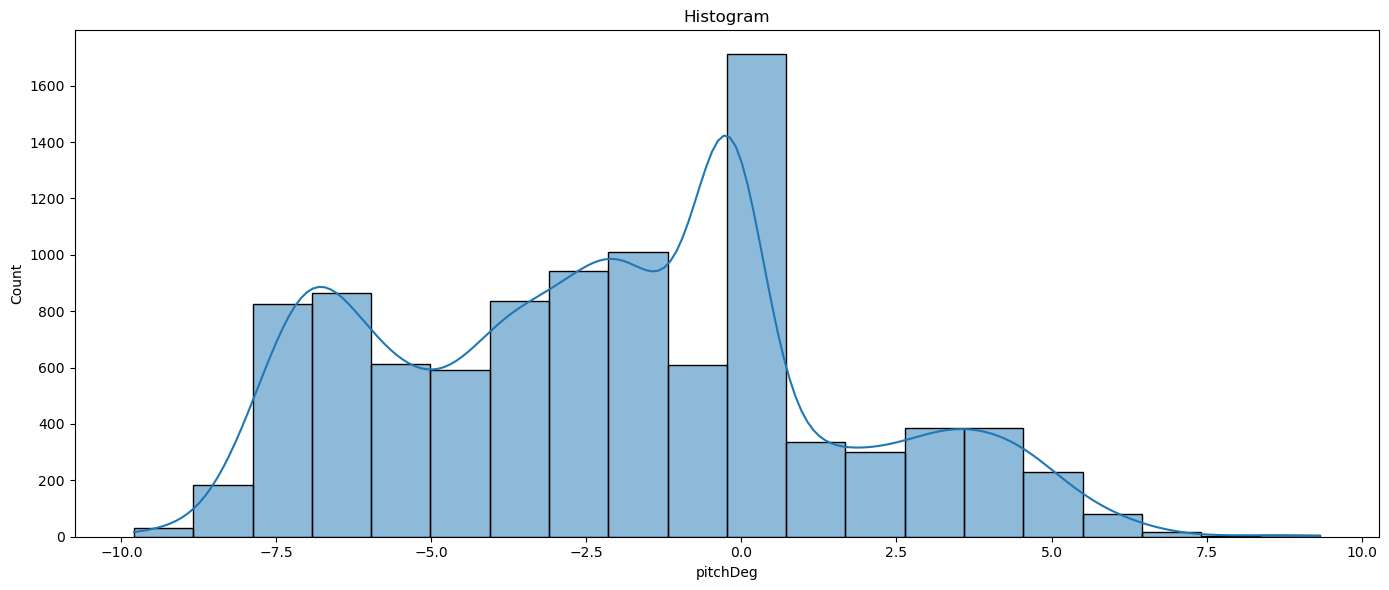

In [59]:
plot_data_analysis(r"Data/run 18/combined_file.csv","TimeMs", "H.Speed")
plot_data_analysis(r"Data/run 18/combined_file.csv","TimeMs", "pitchDeg")

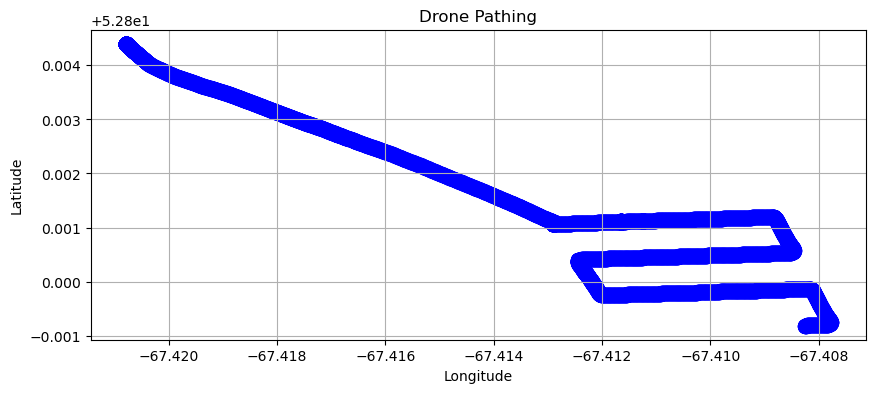

In [60]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Step 1: Load Data from CSV
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv(r"Data/run 18/combined_file.csv")

# Step 2: Convert to GeoDataFrame
# Assuming your CSV has columns named 'Latitude' and 'Longitude'
geometry = [Point(xy) for xy in zip(df['longitudeDeg'], df['latitudeDeg'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Step 3: Plotting the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='blue', markersize=100)



plt.title('Drone Pathing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

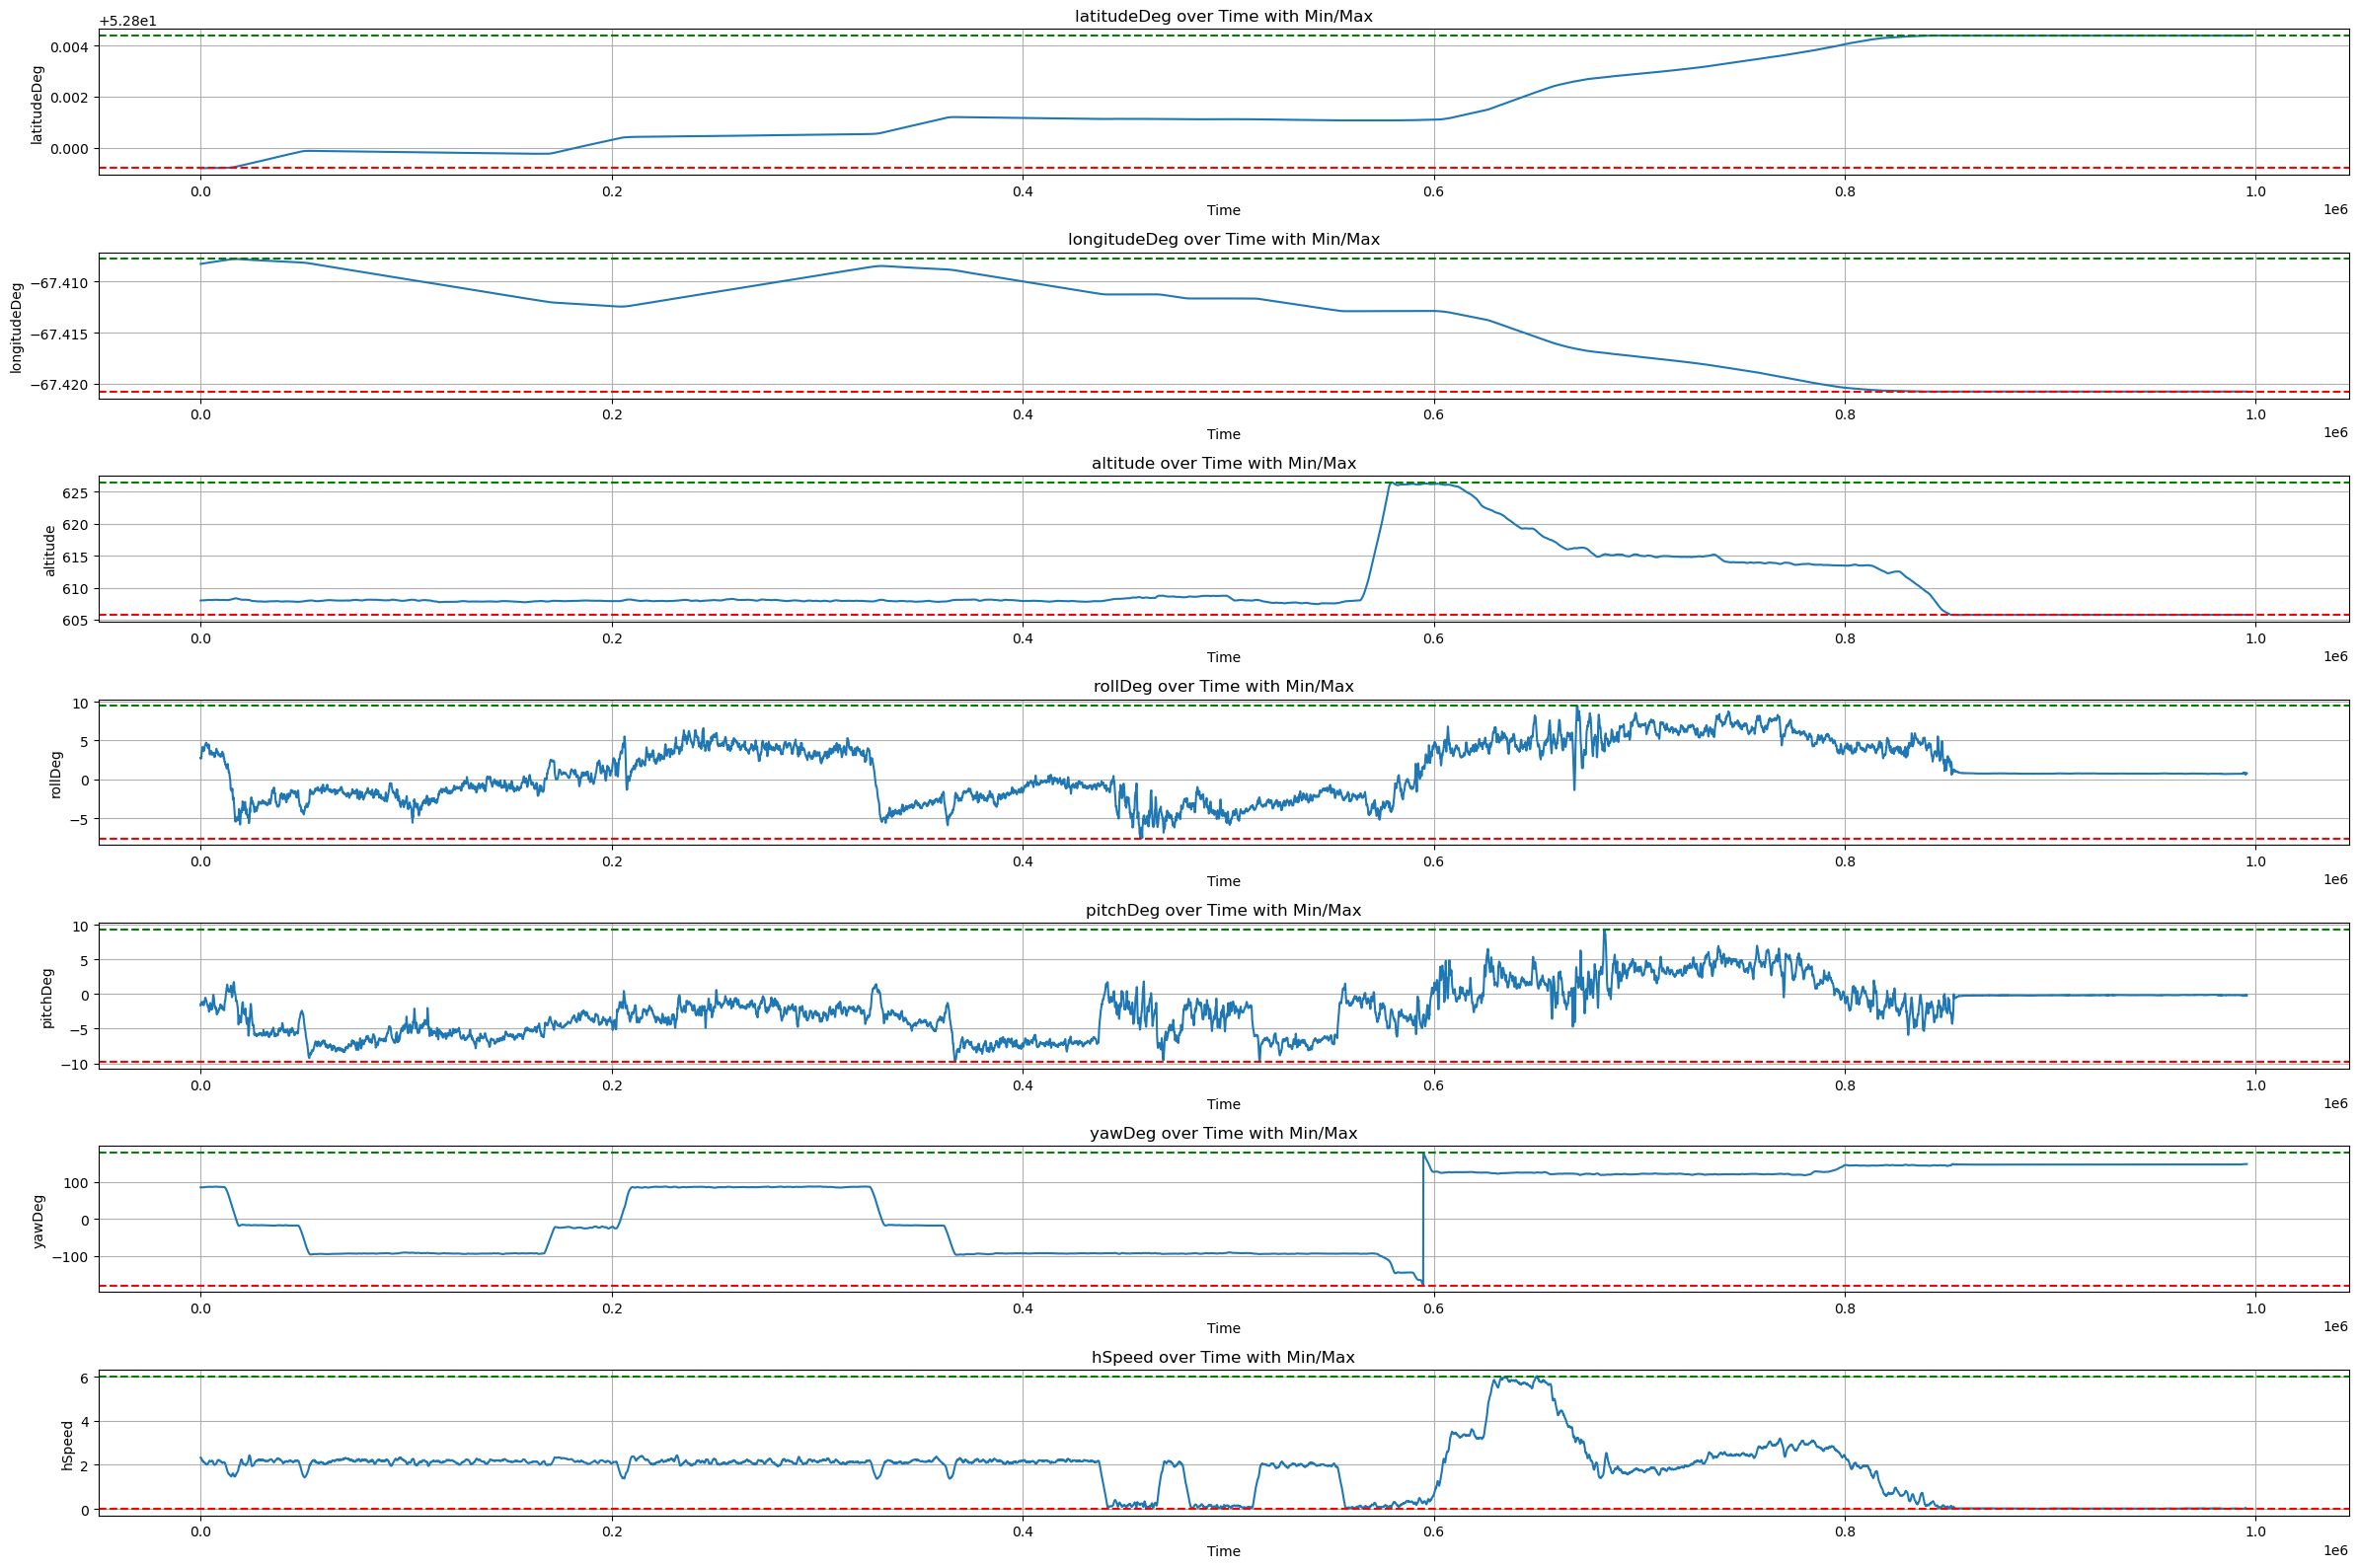

In [61]:

# Select columns (you can modify these to select any columns)
columns_to_plot = ['latitudeDeg', 'longitudeDeg', 'altitude',
       'rollDeg', 'pitchDeg', 'yawDeg', 'hSpeed']  

# Plot selected columns 
plt.figure(figsize=(24, 16))

for i, col in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1)
    plt.plot(df['TimeMs'], df[col], label=f'{col}')
    plt.axhline(y=df[col].min(), color='r', linestyle='--', label='Min')
    plt.axhline(y=df[col].max(), color='g', linestyle='--', label='Max')
    plt.title(f'{col} over Time with Min/Max')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

KeyError: 'time'

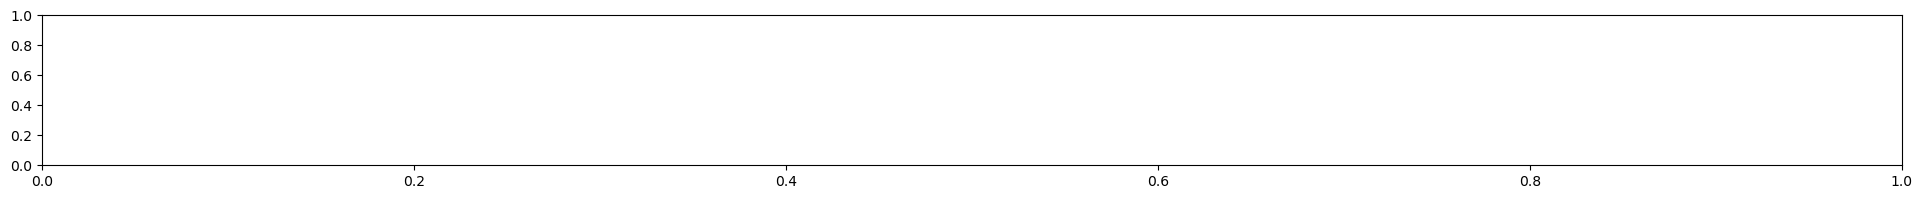

In [62]:
plt.figure(figsize=(24, 16))

rates_to_plot = ['rollDeg', 'pitchDeg', 'yawDeg', 'hSpeed']

for i, col in enumerate(columns_to_plot):
    rate_of_change = np.gradient(df[col])  # Calculate rate of change using gradient
    plt.subplot(len(columns_to_plot), 1, i + 1)
    plt.plot(df['time'], rate_of_change, label=f'Rate of Change of {col}', color='orange')
    plt.title(f'Rate of Change of {col} over Time')
    plt.xlabel('Time')
    plt.ylabel(f'Rate of Change of {col}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

hello

In [5]:
# Function to calculate basic statistics for a column
def calculate_statistics(column):
    stats = {
        'mean': np.mean(column),
        'std': np.std(column),
        'min': np.min(column),
        'max': np.max(column),
    }
    return stats

# Calculate and display statistics for each selected column
for col in columns_to_plot:
    print(f'\nStatistics for {col}:')
    stats = calculate_statistics(df[col])
    for stat_name, stat_value in stats.items():
        print(f'{stat_name}: {stat_value}')



Statistics for latitudeDeg:
mean: 52.80132032308971
std: 0.002048407125606695
min: 52.798431808165816
max: 52.80439554826017

Statistics for longitudeDeg:
mean: -67.41373509065549
std: 0.004712840533959795
min: -67.42078846187881
max: -67.40743559984664

Statistics for altitude:
mean: 609.9090222198042
std: 4.3823006163457965
min: 605.7195434570312
max: 626.42919921875

Statistics for rollDeg:
mean: 1.1937272027351433
std: 3.091340126368555
min: -8.214558601379395
max: 9.462847709655762

Statistics for pitchDeg:
mean: -2.90959451263035
std: 3.5723799166048593
min: -12.762908935546877
max: 9.325761795043944

Statistics for yawDeg:
mean: 52.826131499566905
std: 101.10233080443881
min: -179.9495391845703
max: 179.93585205078125

Statistics for hSpeed:
mean: 1.9849257485216114
std: 1.6255879360219199
min: 0.0003675507116623
max: 6.483234600837512


In [6]:
# Calculate the Pearson correlation coefficient
angle_columns = ['rollDeg', 'pitchDeg', 'yawDeg']
x_column = 'hSpeed'
for angle in angle_columns:
    correlation = df[x_column].corr(df[angle])
    print(f"Pearson correlation coefficient for {angle} and {x_column} : {correlation}")


Pearson correlation coefficient for rollDeg and hSpeed : 0.2748637184578799
Pearson correlation coefficient for pitchDeg and hSpeed : -0.3476942096746568
Pearson correlation coefficient for yawDeg and hSpeed : 0.037523808420753216


In [7]:
import numpy as np

angle_columns = ['rollDeg', 'pitchDeg', 'yawDeg']
x_column = 'hSpeed'

for angle in angle_columns:
    # Compute the gradients of both columns
    x_gradient = np.gradient(df[x_column])
    angle_gradient = np.gradient(df[angle])
    
    # Compute the Pearson correlation coefficient between the gradients
    correlation = np.corrcoef(x_gradient, angle_gradient)[0, 1]
    
    print(f"Pearson correlation coefficient between the gradients of {angle} and {x_column}: {correlation}")


Pearson correlation coefficient between the gradients of rollDeg and hSpeed: 0.02074133494682833
Pearson correlation coefficient between the gradients of pitchDeg and hSpeed: -0.0741963833246474
Pearson correlation coefficient between the gradients of yawDeg and hSpeed: 0.016099951447692572
